# Домашнее задание №2

In [1]:
import numpy as np
from hashlib import sha256

def check(image, ref_hash):
    image_hash = sha256(np.ascontiguousarray(image)).hexdigest()
    if image_hash == ref_hash:
        print("All good \U0001F44D")
    else:
        raise RuntimeError("Image hash differ: " + image_hash)

## Задание 1

Преобразовать исходное изображение в градации серого и построить гистограмму полученного серого изображения

In [2]:
import cv2
import skimage
import skimage.io
from matplotlib import pyplot as plt

src_image_url = 'https://drive.google.com/u/0/uc?id=1wirCkM1bR8vfYrid1gTx0ZtWo-4r1iDm&export=download'
src_image = skimage.io.imread(src_image_url)

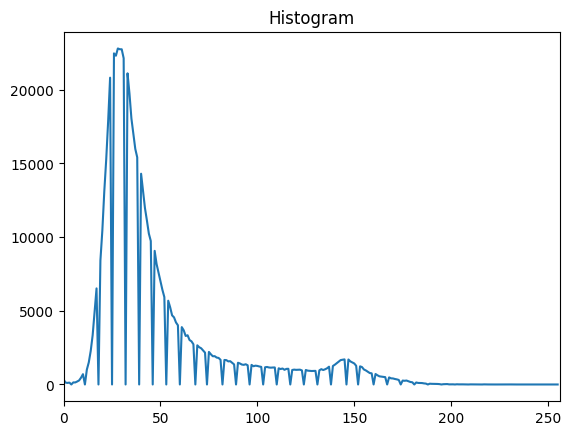

In [3]:
# Write your code here
gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)
src_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(src_hist)
plt.xlim([0,256])
plt.title("Histogram");

In [4]:
check(gray_image, "a0465d0bdaa1e91a106df4b0a276be88e9005e3f6d46d675db39f357b507162b")

All good 👍


## Задание 2

Провести эквализацию гистограммы серого изображения и построить гистограмму полученного изображения

In [5]:
# Write your code here
eq_image = cv2.equalizeHist(gray_image)
eq_hist = cv2.calcHist([eq_image], [0], None, [256], [0, 256])

All good 👍


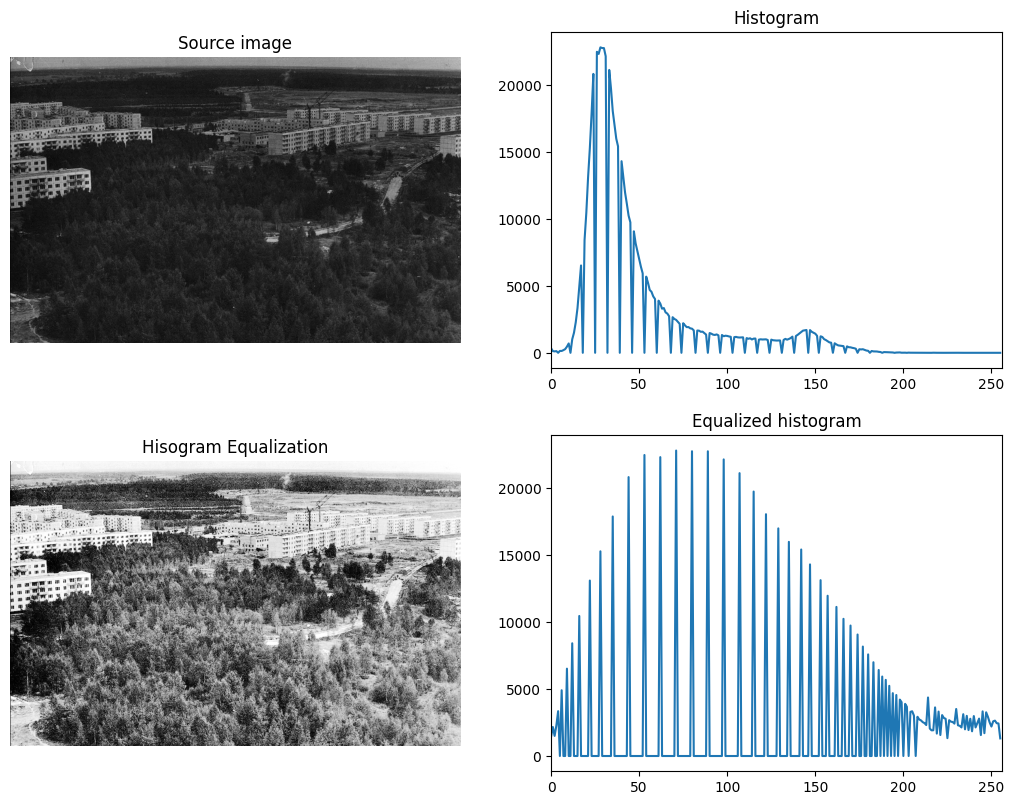

In [6]:
plt.figure(figsize=[6.4 * 2, 4.8 * 2])
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Source image")

plt.subplot(2, 2, 2)
plt.plot(src_hist)
plt.xlim([0,256])
plt.title("Histogram")

plt.subplot(2, 2, 3)
plt.imshow(eq_image, cmap='gray')
plt.axis("off")
plt.title("Hisogram Equalization")

plt.subplot(2, 2, 4)
plt.plot(eq_hist)
plt.xlim([0,256])
plt.title("Equalized histogram")

check(eq_image, "5a853aff843d1ba27815714147c01496c44ed03f4f0e7f3b80b23273a5db054d")

## Задание 3

Преобразовать изображение в градации серого и провести сглаживание исходного изобажения усредняющими фильтрами размера 3х3, 5х5, 7х7

In [7]:
src_image_url = 'https://drive.google.com/u/0/uc?id=1gxplXp2g3dwWR05uMAI6qEItV3I1zHmf&export=download'
src_image = skimage.io.imread(src_image_url)

In [8]:
# Write your code here
gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)

blur_sizes = [3, 5, 7]

blured_images = [cv2.blur(gray_image, (ksize, ksize)) for ksize in blur_sizes]

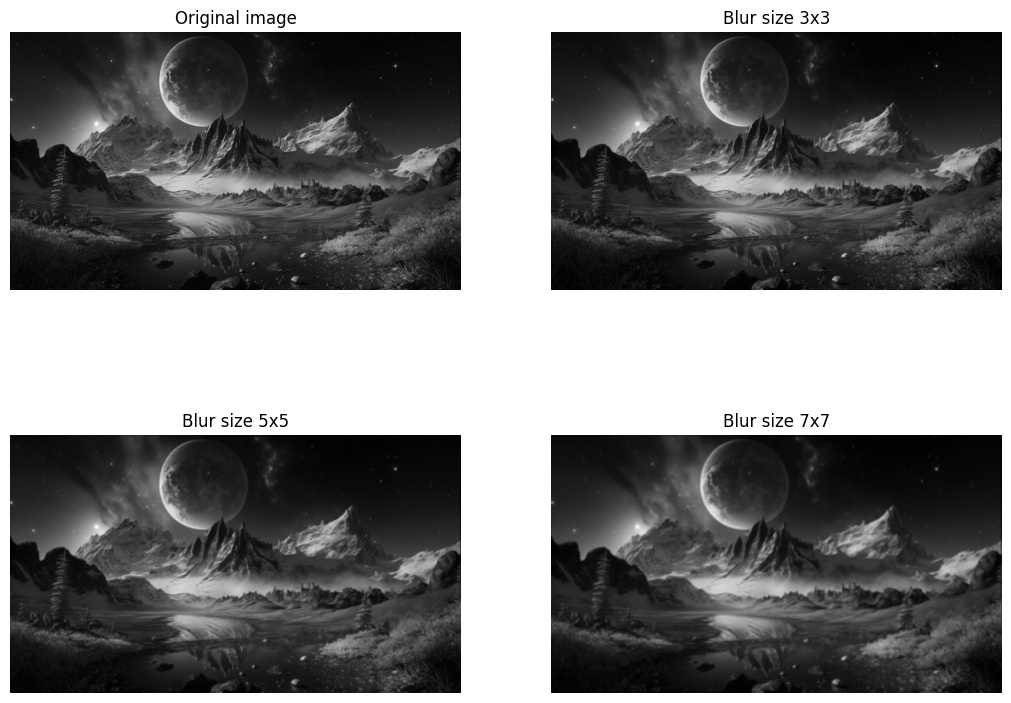

In [9]:
plt.figure(figsize=[6.4 * 2, 4.8 * 2])
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

for i in range(0, len(blur_sizes)):
    plt.subplot(2, 2, i + 2)
    plt.imshow(blured_images[i], cmap='gray')
    plt.axis("off")
    plt.title("Blur size " + str(blur_sizes[i]) + 'x' + str(blur_sizes[i]))

## Задание 4

Провести фильтрацию исходного изображения фильтром повышения резкости

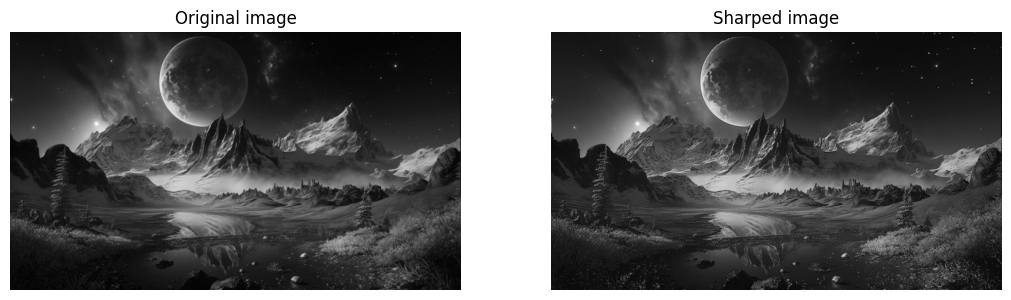

In [10]:
# Write your code here
high_freq = cv2.Laplacian(gray_image, -1)
filtered = gray_image - high_freq

plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(filtered, cmap='gray')
plt.axis("off")
plt.title("Sharped image");

## Задание 5

Наложить на исходное изображение шум "Соль и перец" в количестве 10%, 25% и 50% пикселей

Для наложения шума используйте функцию [skimage.util.random_noise](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise). Для проверки изображений в качестве параметра `seed` используйте заданное значение

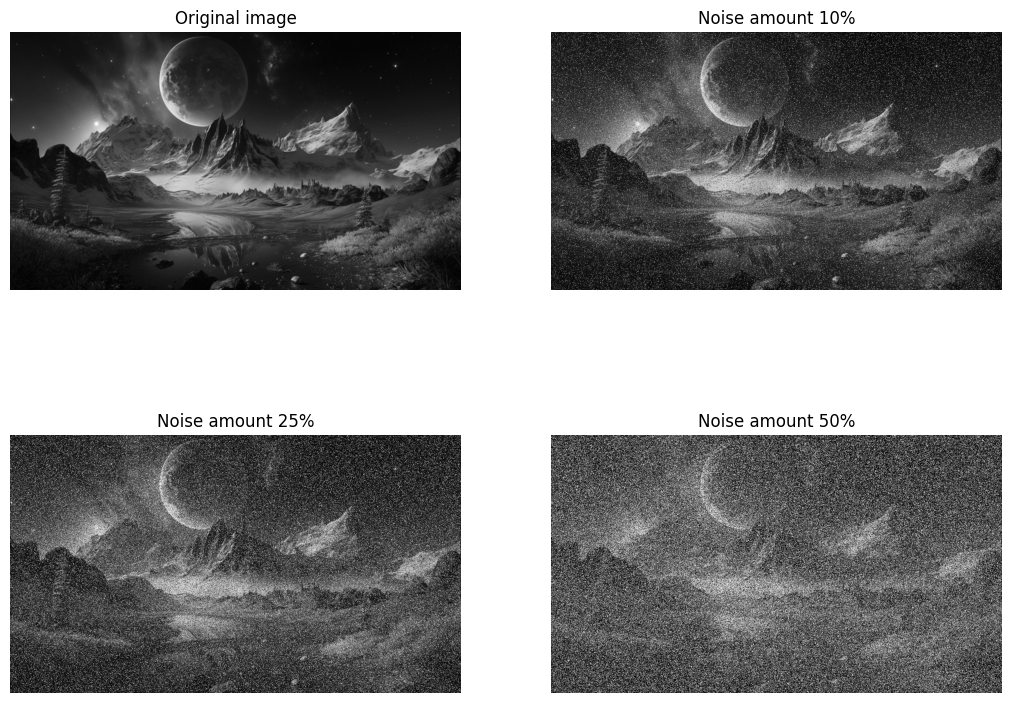

In [11]:
import skimage.util

seed = 42
noise_powers = [10, 25, 50]

# Write your code here
noised_images = [(skimage.util.random_noise(gray_image, mode="s&p", amount=percent / 100) * 255).astype('uint8') for percent in noise_powers]

plt.figure(figsize=[6.4 * 2, 4.8 * 2])
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

for i in range(0, len(noise_powers)):
    plt.subplot(2, 2, i + 2)
    plt.imshow(noised_images[i], cmap='gray')
    plt.axis("off")
    plt.title("Noise amount " + str(noise_powers[i]) + '%')

## Задание 6

Выполните медианную фильтрацию зашумлённых изображений фильтрами размера 3х3, 5х5, 7х7

In [12]:
median_sizes = [3, 5, 7]

# Write your code here
median_images = [[cv2.medianBlur(img, ksize) for ksize in median_sizes] for img in noised_images]

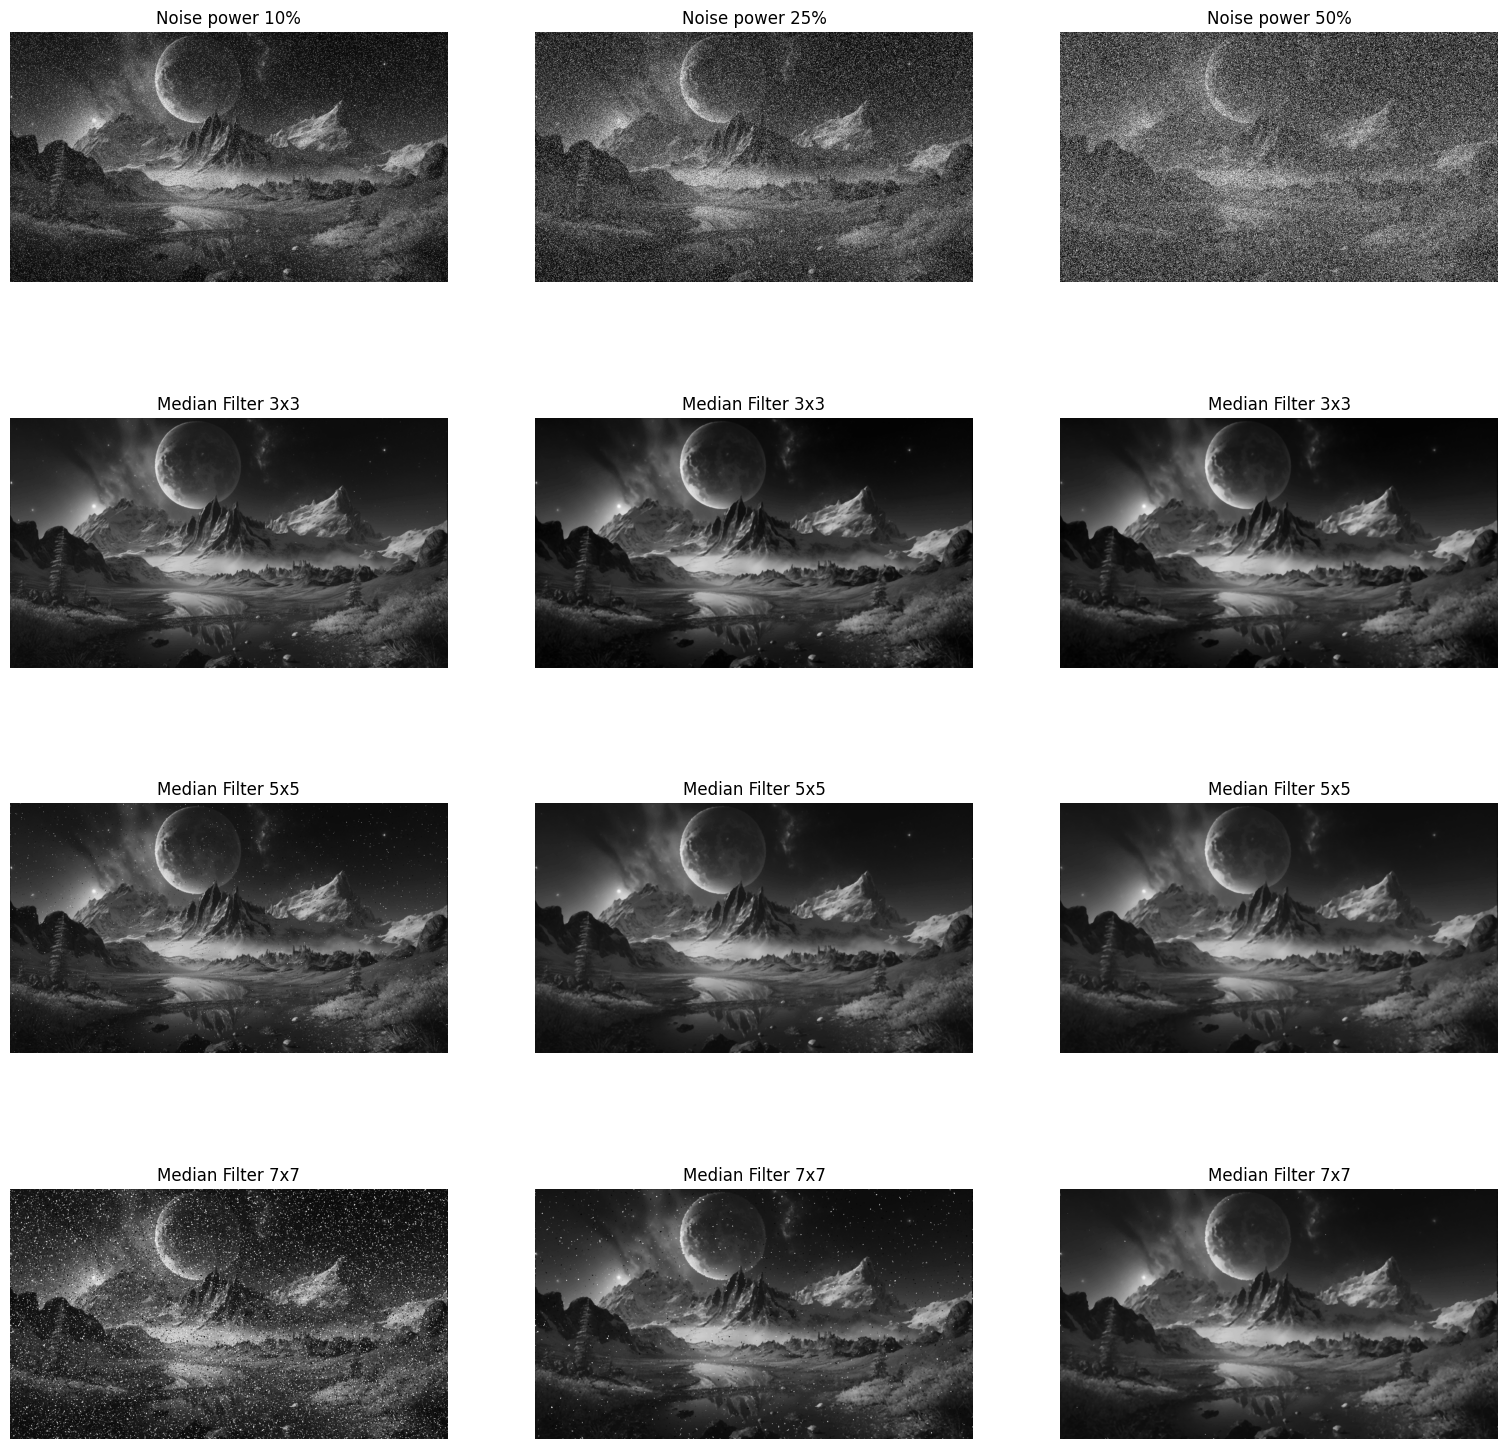

In [13]:
figure_cols = len(noise_powers)
figure_rows = len(median_sizes) + 1
plt.figure(figsize=[6.4 * figure_cols, 4.8 * figure_rows])

for i in np.arange(0, figure_cols): 
    plt.subplot(figure_rows, figure_cols, i + 1)
    plt.imshow(noised_images[i], cmap='gray')
    plt.axis("off")
    plt.title("Noise power " + str(noise_powers[i]) + "%")
    
    for j in np.arange(1, figure_rows):
        plt.subplot(figure_rows, figure_cols, j * figure_cols + i + 1)
        plt.imshow(median_images[j - 1][i], cmap='gray')
        plt.axis("off")
        plt.title("Median Filter " + str(median_sizes[j - 1]) + "x" + str(median_sizes[j - 1]))

### Выполнил: Лежнин Максим Витальевич